In [10]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df = pd.read_csv('campeonato.csv')

### Tratamentos

 #### O que é um Tratamento?

Um tratamento em um jogo de futebol é quando um jogador é lesionado e precisa receber atendimento médico dentro de campo.

#### Análise geral da coluna

A coluna de tratamentos é a coluna com maior número de dados ausentes na nossa base de dados, tendo somente 18% dos dados preenchidos. Por isso, devemos verificar se é necessário preencher essa coluna para nosso modelo.

In [11]:
df = pd.read_csv('campeonato.csv')
tratamentos = df[['Tratamentos 1', 'Tratamentos 2']]
print(tratamentos.describe(),'\n')
print("Porcentagem de dados nulos =", round((1-len(tratamentos.dropna())/len(df))*100),"%")

       Tratamentos 1  Tratamentos 2
count    5019.000000    5019.000000
mean        1.995617       2.134489
std         2.258323       2.296141
min         0.000000       0.000000
25%         0.000000       0.000000
50%         1.000000       2.000000
75%         3.000000       3.000000
max        17.000000      16.000000 

Porcentagem de dados nulos = 82 %


Para verificar a relevância da coluna de Tratamentos no modelo, usamos uma tabela de correlação da coluna Tratamentos 1 e Tratamentos 2 com as demais da base de dados.

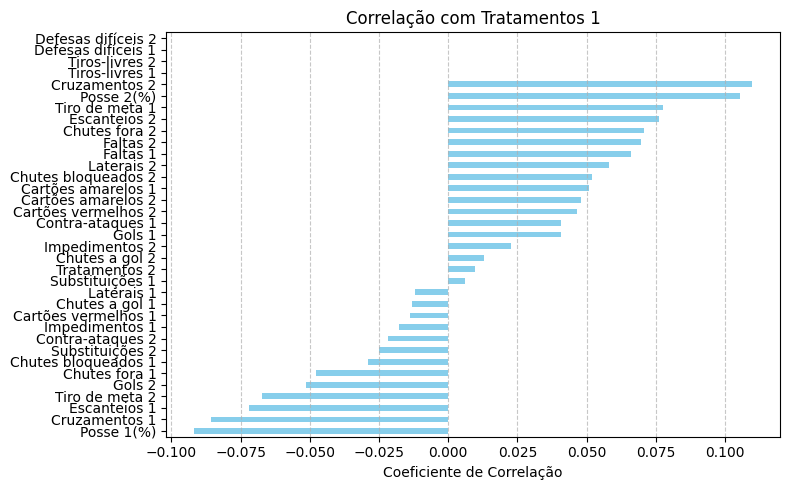

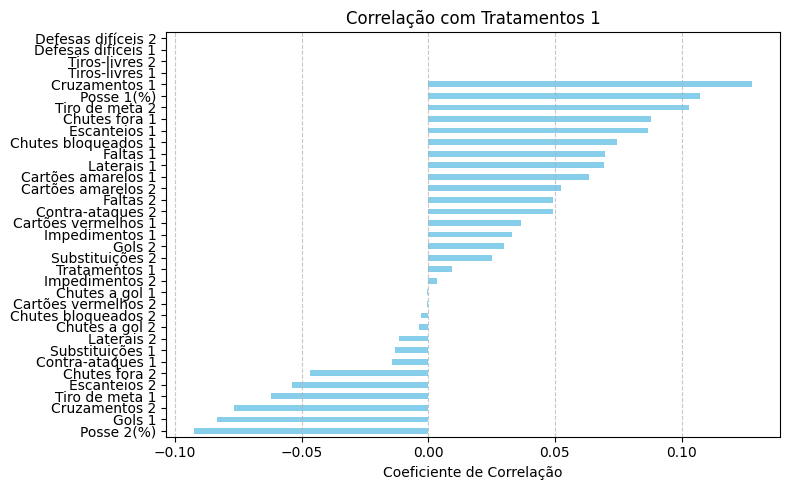

In [12]:
correlacoes1 = df.corr(numeric_only=True)["Tratamentos 1"].drop("Tratamentos 1")

plt.figure(figsize=(8, 5))
correlacoes1.sort_values().plot(kind='barh', color='skyblue')
plt.title("Correlação com Tratamentos 1")
plt.xlabel("Coeficiente de Correlação")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

correlacoes2 = df.corr(numeric_only=True)["Tratamentos 2"].drop("Tratamentos 2")

plt.figure(figsize=(8, 5))
correlacoes2.sort_values().plot(kind='barh', color='skyblue')
plt.title("Correlação com Tratamentos 1")
plt.xlabel("Coeficiente de Correlação")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Analisando os gráfico, verificamos uma correlação baixíssima para todas as colunas, o que mostra a pequena influência que essa coluna tem nas estatísticas do jogo e, principalmente, no resultado  (Gols 1 e Gols 2).

#### Conclusão

Por serem as colunas com menor número de dados e por ser difícil de prever o número de Tratamentos pela baixa correlação das colunas, a decisão do grupo foi a de não usar essas colunas como features.

In [13]:
df.drop(['Tratamentos 1', 'Tratamentos 2'], axis=1, inplace=True)
df.to_csv('campeonato.csv', index=False)